In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
df = pd.read_csv('data_sets/insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<p>Categorical features are sex, smoker and region.</p>

In [7]:
df.shape

(1338, 7)

In [8]:
# check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
# check for duplicates
df.duplicated().sum()
df[df.duplicated()]

# drop duplicates
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
# describe basic statistics
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


<p>From this we can estimate that there is a wide vaiability in ages in the dataset</p>

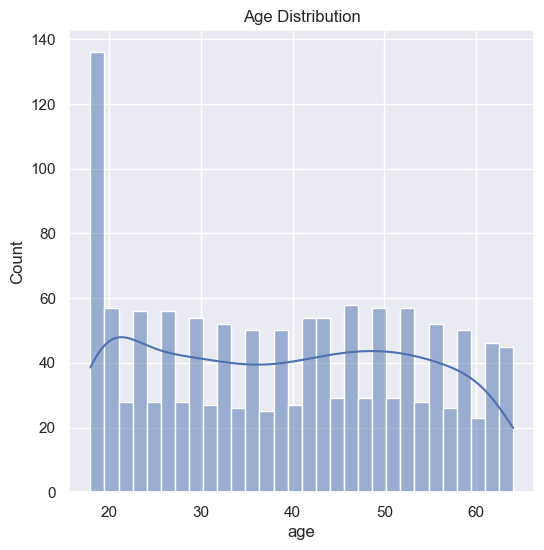

In [15]:
# Set figure size
plt.figure(figsize=(6,6))
sns.histplot(df['age'], bins=30, kde=True)

plt.title('Age Distribution')

# Show the plot
plt.show()

<p>This shows the most number of people less aprox of age 18 are indulge in having the isurance

<Figure size 600x600 with 0 Axes>

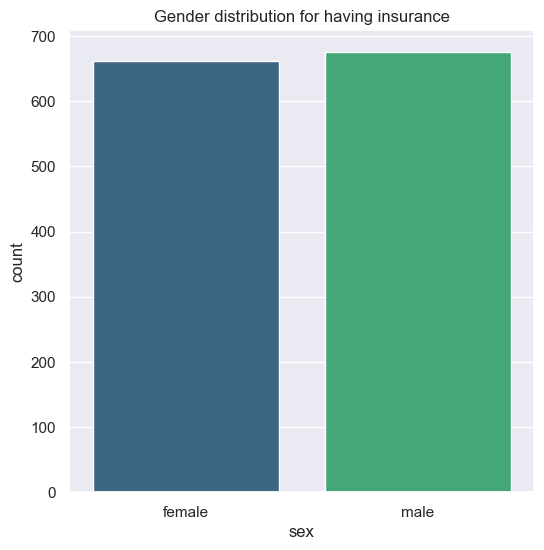

In [26]:
# gender distribution
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='sex', hue='sex', palette='viridis')
plt.title('Gender distribution for having insurance')
plt.show()

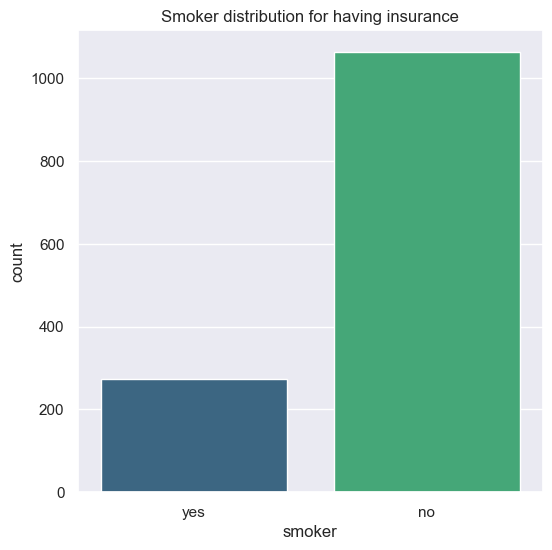

In [27]:
# smoker distribution
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='smoker', hue='smoker', palette='viridis')
plt.title('Smoker distribution for having insurance')
plt.show()

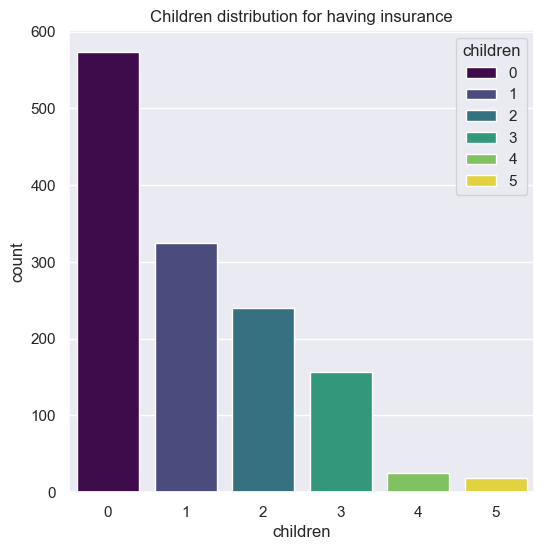

In [28]:
# childeren distribution
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='children', hue='children', palette='viridis')
plt.title('Children distribution for having insurance')
plt.show()

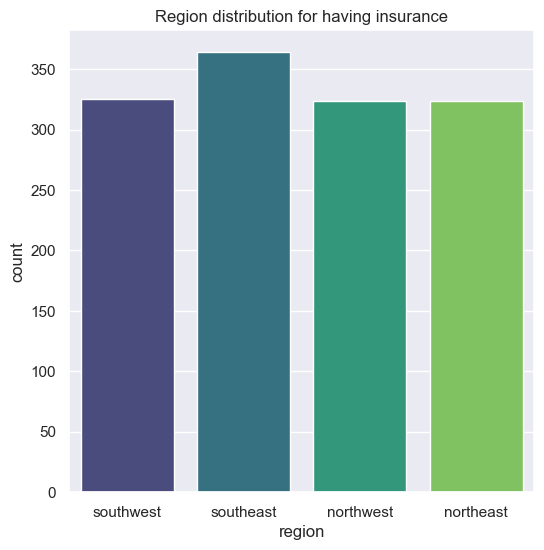

In [29]:
# region distribution
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='region', hue='region', palette='viridis')
plt.title('Region distribution for having insurance')
plt.show()

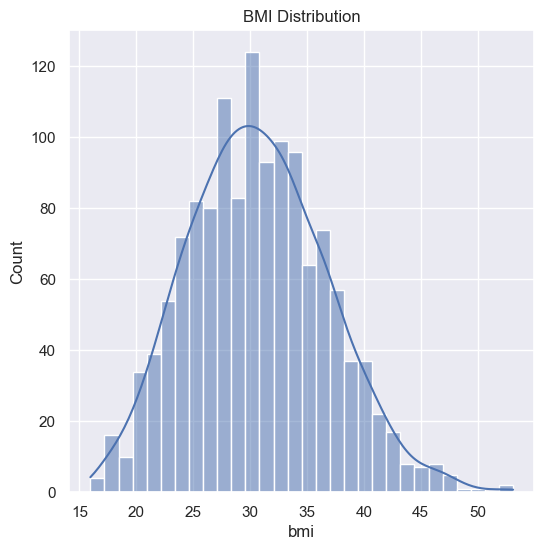

In [30]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('BMI Distribution')
plt.show()

<p>Above histplot says that, bmi follows normal distribution that means most of the data are around the mean.

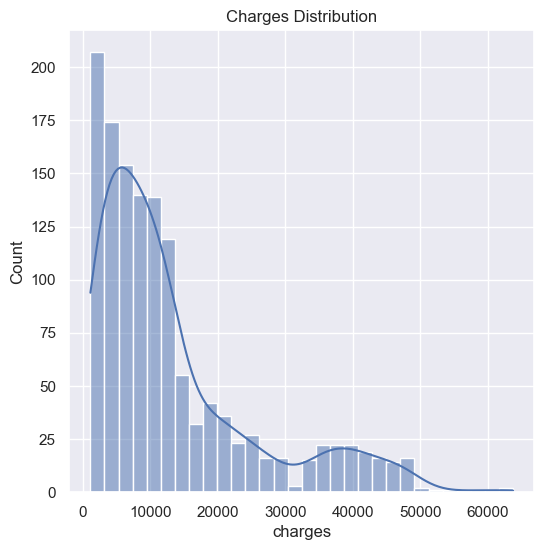

In [31]:
# charges distribution
plt.figure(figsize=(6,6))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Charges Distribution')
plt.show()

In [32]:
df['charges'].skew()

1.5153909108403483

<p>This means that the charges are positively skewed, where mean>median. More people have lower charges, with a few individuals having very high charges.

In [92]:
from sklearn.preprocessing import LabelEncoder
# encoding categorical data for regression model
encoded_df = pd.get_dummies(df, columns=['sex', 'smoker'], drop_first=True) # one hot encoding for binary categorical data

encoder = LabelEncoder()
encoded_df['region'] = encoder.fit_transform(encoded_df['region'])
print(encoded_df)

      age     bmi  children  region      charges  sex_male  smoker_yes
0      19  27.900         0       3  16884.92400     False        True
1      18  33.770         1       2   1725.55230      True       False
2      28  33.000         3       2   4449.46200      True       False
3      33  22.705         0       1  21984.47061      True       False
4      32  28.880         0       1   3866.85520      True       False
...   ...     ...       ...     ...          ...       ...         ...
1333   50  30.970         3       1  10600.54830      True       False
1334   18  31.920         0       0   2205.98080     False       False
1335   18  36.850         0       2   1629.83350     False       False
1336   21  25.800         0       3   2007.94500     False       False
1337   61  29.070         0       1  29141.36030     False        True

[1338 rows x 7 columns]


In [93]:
X = encoded_df.drop('charges', axis=1)
y = encoded_df['charges']

In [94]:
print(X)
print(y)

      age     bmi  children  region  sex_male  smoker_yes
0      19  27.900         0       3     False        True
1      18  33.770         1       2      True       False
2      28  33.000         3       2      True       False
3      33  22.705         0       1      True       False
4      32  28.880         0       1      True       False
...   ...     ...       ...     ...       ...         ...
1333   50  30.970         3       1      True       False
1334   18  31.920         0       0     False       False
1335   18  36.850         0       2     False       False
1336   21  25.800         0       3     False       False
1337   61  29.070         0       1     False        True

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [95]:
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [96]:
# Initialize the Linear Regression model
import joblib
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model
model.fit(X_train, y_train) # need to fit_transform if scaled

# save the model inside the 'Model' directory
model_filepath = 'model/insurance_linear_regression_model.pkl'
joblib.dump(model, model_filepath)

['model/insurance_linear_regression_model.pkl']

In [97]:
print(X_train.shape)  # Features training data
print(y_train.shape)

(1070, 6)
(1070,)


In [102]:
from sklearn import metrics
# prediction on training data
training_data_prediction =model.predict(X_train)
# R squared value
r2_train = metrics.r2_score(y_train, training_data_prediction)


# Display the results

print(f"R-squared (R^2): {r2_train}")

R-squared (R^2): 0.7417049283233981


In [101]:
# prediction on test data
test_data_prediction =model.predict(X_test)
# R squared value
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R squared value : ', r2_test)

R squared value :  0.7833463107364538
